In [38]:
from proj1_helpers import *
from implementations import *
from costs import *
from data_helper import *
from plots import *

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Importing the data

In [39]:
DATA_PATH = 'data/'

In [40]:
y_tr, x_tr, ids_tr = load_csv_data(DATA_PATH + "train.csv")

print('y_tr.shape =', y_tr.shape)
print('x_tr.shape =', x_tr.shape)
print('ids_tr.shape =', ids_tr.shape)

y_tr.shape = (250000,)
x_tr.shape = (250000, 30)
ids_tr.shape = (250000,)


In [48]:
y_te, x_te, ids_te = load_csv_data(DATA_PATH + "test.csv")

print('y_te.shape =', y_te.shape)
print('x_te.shape =', x_te.shape)
print('ids_te.shape =', ids_te.shape)
ids_te

y_te.shape = (568238,)
x_te.shape = (568238, 30)
ids_te.shape = (568238,)


array([350000, 350001, 350002, ..., 918235, 918236, 918237])

# Additional functions

In [42]:
def fast_buildpoly(x,ma,degree):
    return np.c_[ma,np.power(x, degree)]

# Dataset exploration

In [43]:
df = pd.DataFrame(x_tr)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,...,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591
std,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,...,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662
min,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,...,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,...,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,...,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500
75%,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,...,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,...,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000


In [44]:
df = pd.DataFrame(x_te)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000,568238.00000,568238.000000,...,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000,568238.000000
mean,-48.729241,49.258387,81.122338,57.829094,-707.441800,-599.731058,-708.384205,2.374211,18.99262,158.668286,...,-0.007981,209.957809,0.980251,-348.946261,-399.886426,-399.899229,-691.293904,-708.143299,-708.146201,73.267629
std,406.018702,35.393465,40.474035,63.304450,454.931763,659.054554,453.464437,0.779978,21.76045,116.258246,...,1.812916,126.956060,0.979394,533.156405,489.468578,489.458204,480.450337,453.837535,453.832741,98.470522
min,-999.000000,0.000000,6.810000,0.000000,-999.000000,-999.000000,-999.000000,0.237000,0.00000,46.103000,...,-3.142000,13.847000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
25%,78.191000,19.330000,59.425000,14.202250,-999.000000,-999.000000,-999.000000,1.815000,2.83800,77.463000,...,-1.574000,122.972250,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000
50%,105.080000,46.467000,73.740000,38.472000,-999.000000,-999.000000,-999.000000,2.492000,12.41300,120.666000,...,-0.016000,179.940000,1.000000,38.968000,-1.862000,-2.110000,-999.000000,-999.000000,-999.000000,40.504000
75%,130.775500,73.630000,92.162750,79.256000,0.503000,84.305500,-4.532000,2.962000,27.65100,201.073000,...,1.559000,264.024750,2.000000,75.520000,0.431000,0.483000,33.838000,-2.427000,-2.260000,110.566500
max,1949.261000,968.669000,1264.965000,1337.187000,8.724000,4794.827000,17.650000,5.751000,759.36300,2079.162000,...,3.142000,2190.275000,3.000000,1163.439000,4.500000,3.142000,817.801000,4.500000,3.142000,1860.175000


# Dataset cleaning

Removal of columns containing at least one value set to -999, plus normalization.

In [45]:
x_without_minus999 = remove_outliers(x_tr)
df = pd.DataFrame(x_without_minus999)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05
mean,1.020282e-16,9.751311e-18,9.162004e-17,-7.397907e-16,-4.456604e-16,-9.455770e-17,3.877090e-16,5.778524e-16,4.188403e-16,2.338485e-17,4.324008e-17,-5.849508e-16,-3.100631e-18,-8.784085e-18,-3.768830e-16,-2.600675e-17,-4.272787e-16,-6.810552e-16,3.716085e-16
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.393127e+00,-1.833346e+00,-9.095194e-01,-2.765453e+00,-8.493221e-01,-9.708082e-01,-1.646196e+00,-1.077173e+00,-8.347041e-01,-2.049317e+00,-1.724955e+00,-9.363391e-01,-1.964848e+00,-1.753567e+00,-1.264895e+00,-1.728202e+00,-1.550358e+00,-1.001792e+00,-7.454394e-01
25%,-8.487474e-01,-5.337736e-01,-6.885057e-01,-7.192400e-01,-7.217711e-01,-6.990329e-01,-6.565436e-01,-1.041147e+00,-6.298254e-01,-7.528580e-01,-8.624306e-01,-6.474184e-01,-7.861728e-01,-8.617948e-01,-6.177068e-01,-8.635164e-01,-6.860094e-01,-1.001792e+00,-7.454394e-01
50%,-7.683784e-02,-1.819798e-01,-3.052124e-01,1.512310e-01,-2.963992e-01,-3.264114e-01,-1.865772e-01,-1.907663e-01,-3.080228e-01,-9.906258e-03,-1.366660e-02,-2.784610e-01,-2.015252e-02,2.337161e-02,-2.102238e-01,-7.659564e-03,-2.376155e-01,2.130497e-02,-3.321118e-01
75%,6.891585e-01,2.713053e-01,3.341898e-01,7.509171e-01,3.894173e-01,3.633872e-01,4.017687e-01,1.133818e+00,2.815264e-01,7.486952e-01,8.659215e-01,3.050002e-01,7.735362e-01,8.667018e-01,3.094051e-01,8.669588e-01,4.235762e-01,1.044402e+00,3.761565e-01
max,1.813095e+01,3.106079e+01,4.362703e+01,4.228969e+00,1.264322e+02,1.464083e+01,2.170533e+01,1.292164e+00,3.237995e+01,2.065746e+00,1.733951e+00,2.327730e+01,1.994109e+00,1.705628e+00,8.514764e+01,1.739370e+00,1.418332e+01,2.067499e+00,1.591961e+01


Values set to -999 now set to the mean of their corresponding column, plus normalization. 
[Source](https://stackoverflow.com/questions/18689235/numpy-array-replace-nan-values-with-average-of-columns)

In [46]:
x_minus999_to_mean = set_outliers_to_mean(x_tr)
df = pd.DataFrame(x_minus999_to_mean)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,...,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05,2.500000e+05
mean,-9.730622e-13,4.495751e-15,-3.484488e-15,7.186464e-15,-7.234368e-12,-6.301890e-12,6.806539e-13,2.162232e-14,6.400580e-15,2.861437e-15,...,1.410405e-16,-8.995097e-15,-6.016982e-16,2.891300e-12,-2.777160e-15,2.538964e-14,-8.407241e-12,2.101340e-14,-5.898430e-15,-1.771223e-15
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.138672e+00,-1.393127e+00,-1.833346e+00,-9.095194e-01,-2.561281e+00,-1.671950e+00,-8.931188e+00,-2.765453e+00,-8.493221e-01,-9.708082e-01,...,-1.728202e+00,-1.550358e+00,-1.001792e+00,-1.166372e+00,-3.251412e+00,-2.227407e+00,-1.606483e+00,-4.100855e+00,-3.208631e+00,-7.454394e-01
25%,-4.965617e-01,-8.487474e-01,-5.337736e-01,-6.885057e-01,-7.229012e-12,-6.304978e-12,6.751165e-13,-7.192400e-01,-7.217711e-01,-6.990329e-01,...,-8.635164e-01,-6.860094e-01,-1.001792e+00,-5.825912e-01,-3.107873e-01,-3.868966e-01,-8.402865e-12,2.277209e-14,-9.073155e-15,-7.454394e-01
50%,-3.602912e-02,-7.683784e-02,-1.819798e-01,-3.052124e-01,-7.229012e-12,-6.304978e-12,6.751165e-13,1.512310e-01,-2.963992e-01,-3.264114e-01,...,-7.659564e-03,-2.376155e-01,2.130497e-02,2.894642e-12,-4.098124e-15,2.693365e-14,-8.402865e-12,2.277209e-14,-9.073155e-15,-3.321118e-01
75%,1.658342e-01,6.891585e-01,2.713053e-01,3.341898e-01,-7.229012e-12,-6.304978e-12,6.751165e-13,7.509171e-01,3.894173e-01,3.633872e-01,...,8.669588e-01,4.235762e-01,1.044402e+00,2.894642e-12,3.155238e-01,3.668159e-01,-8.402865e-12,2.277209e-14,-9.073155e-15,3.761565e-01
max,2.028761e+01,1.813095e+01,3.106079e+01,4.362703e+01,6.499024e+00,2.148720e+01,9.069668e+00,4.228969e+00,1.264322e+02,1.464083e+01,...,1.739370e+00,1.418332e+01,2.067499e+00,2.203619e+01,3.256148e+00,2.244336e+00,3.852478e+01,4.122501e+00,3.211864e+00,1.591961e+01


# Model 0: Linear regression (raw data)

Error: Singular matrix
    
The code is therefore commented.

In [47]:
degrees = np.arange(20) + 1
acc_0 = []
polyx_0 = np.ones((x_tr.shape[0], 1))

for degree in degrees:
    polyx_0 = fast_buildpoly(x_tr, polyx_0, degree)
    w_0, loss = least_squares(y_tr, polyx_0)
    acc_0.append(compute_categorical_loss(y_tr, polyx_0, w_0))    

LinAlgError: Singular matrix

In [ ]:
plt.plot(degrees, acc_0, 'r') 
plt.xlabel('Degree')
plt.ylabel('Error')
plt.show()
print('Best degree =', acc_0.index(min(acc_0)) + 1)

# Model 1: Linear Regression (without sparse data columns)

In [ ]:
degrees = np.arange(20) + 1
acc_1 = []
polyx_1 = np.ones((x_without_minus999.shape[0], 1))

for degree in degrees:
    polyx_1 = fast_buildpoly(x_without_minus999, polyx_1, degree)
    w_1, loss = least_squares(y_tr, polyx_1)
    acc_1.append(compute_categorical_loss(y_tr, polyx_1, w_1))

In [ ]:
plt.plot(degrees, acc_1, 'r') 
plt.xlabel('Degree')
plt.ylabel('Error')
plt.show()
print('Min =', min(acc_1))
print('Best degree =', acc_1.index(min(acc_1)) + 1)

# Model 2: Linear regression with unknown set up to the mean

In [ ]:
degrees = np.arange(20) + 1
acc_2 = []
polyx_2 = np.ones((x_minus999_to_mean.shape[0], 1))
for degree in degrees:
    polyx_2 = fast_buildpoly(x_minus999_to_mean, polyx_2, degree)
    w_2, loss = least_squares(y_tr, polyx_2)
    acc_2.append(compute_categorical_loss(y_tr, polyx_2, w_2))

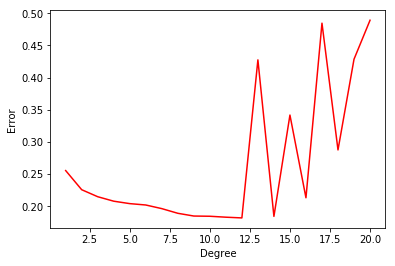

0.181836
Best degree = 12


In [19]:
plt.plot(degrees, acc_2, 'r') 
plt.xlabel('Degree')
plt.ylabel('Error')
plt.show()
print('Min =', min(acc_2))
print('Best degree =', acc_2.index(min(acc_2)) + 1)

In [51]:
polyx_2 = build_poly(x_without_minus999, 12)
w_2, loss = least_squares(y_tr, polyx_2)

polyx_2_te = build_poly(remove_outliers(x_te), 12)
pred = predict_labels(w_2, polyx_2_te)
create_csv_submission(ids_te, pred, 'model2.csv')

# Model 3 : Delete the correlate variable

In [15]:
#replace unknown to mean and normalize
inT=np.transpose(x_tr.copy())
means = [specialmean(a) for a in inT]
std = [specialstd(a) for a in inT]
x_3 = np.transpose([[x if x!=-999 else means[i] for x in inT[i]] for i in range(len(inT))] )
x_3 = (x_3-means)/std
#
x_3T = np.transpose(x_3)
x_3T = [[x if abs(x)<2 else 0 for x in x_3T[i]] for i in range(len(x_3T))] 
x_3 = np.transpose(x_3T)

In [16]:
for i in range(30):
    for j in range(30):
        if i != j and i < j:
            corr = np.abs(np.corrcoef(x_3T[j],x_3T[i])[1][0])
            if corr > 0.6:
                print(str(i)+" , "+str(j)+" : "+ str(corr))

0 , 2 : 0.6849876944988297
3 , 9 : 0.7258348600961813
3 , 21 : 0.6641384598175214
3 , 22 : 0.6373975566845621
3 , 29 : 0.7307059138912009
4 , 5 : 0.7466310498797766
4 , 6 : 0.7945007322648371
4 , 12 : 0.6216415127054433
5 , 6 : 0.6567665938969914
9 , 21 : 0.7853715393577978
9 , 22 : 0.7048944589048857
9 , 29 : 0.8974638684753714
21 , 22 : 0.610576244544037
21 , 29 : 0.7490781844165592
22 , 29 : 0.7543122487671813


We can try to delete the collumn 0,3,4,5,9,21,22
